In [34]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [35]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

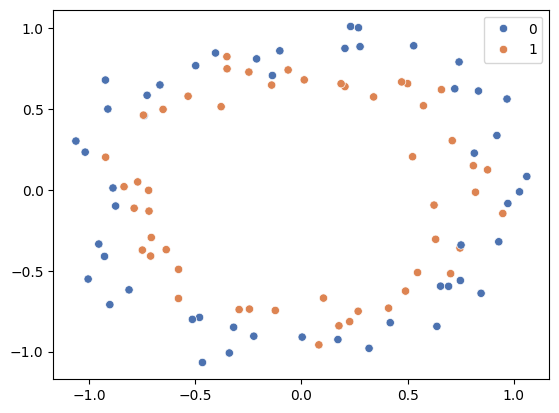

In [36]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='deep')
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [38]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

D:\Artificial Intelligence\Deep-Learning\ANN-Handwrittn-Digit-Classification\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500 , verbose=0)

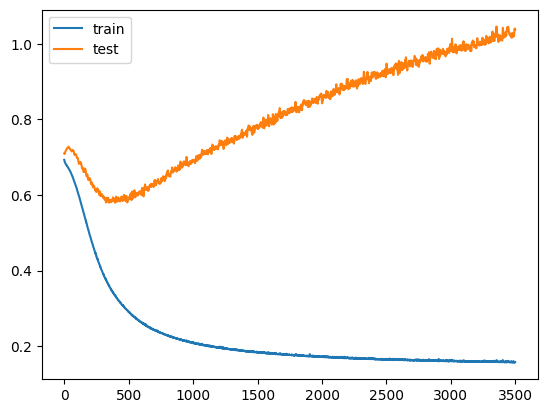

In [41]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 419us/step


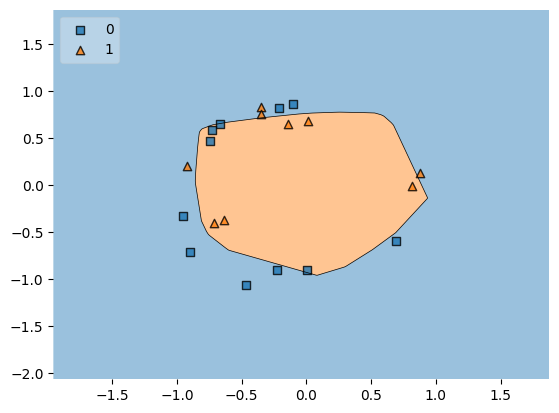

In [42]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

Early Stopping

In [49]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

D:\Artificial Intelligence\Deep-Learning\ANN-Handwrittn-Digit-Classification\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [52]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.5125 - loss: 0.7004 - val_accuracy: 0.4500 - val_loss: 0.6987
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5125 - loss: 0.6971 - val_accuracy: 0.4000 - val_loss: 0.6997
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5250 - loss: 0.6944 - val_accuracy: 0.5500 - val_loss: 0.6999
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4875 - loss: 0.6929 - val_accuracy: 0.3500 - val_loss: 0.7018
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5500 - loss: 0.6908 - val_accuracy: 0.4000 - val_loss: 0.7027
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5375 - loss: 0.6895 - val_accuracy: 0.4500 - val_loss: 0.7038
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5500 - loss: 0.6891 - val_accuracy: 0.4500 - val_loss: 0.7062
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5375 - loss: 0.6878 - val_accuracy: 0.4000 - v

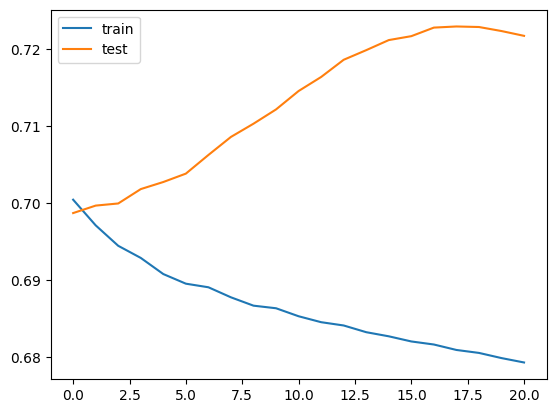

In [53]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 427us/step


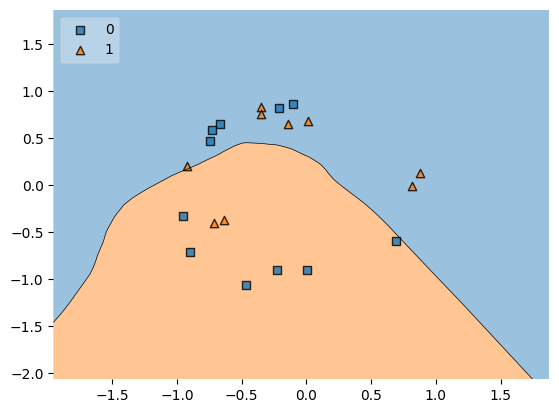

In [54]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()